<a href="https://colab.research.google.com/github/yukti845/Reddit-Flair-Detection/blob/main/script/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/data.csv')

In [3]:
data.head()

,flair,title,score,id,url,comms_num,body,author,comments,timestamp,combined_features
0,AskIndia,approach girl,3,k0qt2r,https://www.reddit.com/r/india/comments/k0qt2r...,15,2 years back working startup company pretty de...,covidmanbun,stop watching indian movies stop stalking go p...,2020-11-25 19:50:12,approach girlstop watching indian movies stop ...
1,AskIndia,gelatine available,0,jk9zlt,https://www.reddit.com/r/india/comments/jk9zlt...,4,wish buy gelatine looking cheapest local price...,csstudentG,available regular kirana stores usually kept r...,2020-10-29 21:26:38,gelatine availableavailable regular kirana sto...
2,AskIndia,trevor noah jokes indo pak tensions seriousnes...,43,gv9lmh,https://www.reddit.com/r/india/comments/gv9lmh...,29,really watch much trevor noah late night show ...,CommYouNitty,mostly country really matter lives pretty chea...,2020-06-02 23:42:24,trevor noah jokes indo pak tensions seriousnes...
3,AskIndia,buying used bs4 scooty april 1 issues registra...,11,hpqq5o,https://www.reddit.com/r/india/comments/hpqq5o...,7,know right place ask askindia asking saw artic...,akza07,scammers keep scamming applies new vehicles bu...,2020-07-12 15:58:15,buying used bs4 scooty april 1 issues registra...
4,AskIndia,need feedback insurance policy took x post ask...,1,1s57oi,https://www.reddit.com/r/india/comments/1s57oi...,1,posting lack activity r askindia hello last ye...,dhavalcoholic,dear policy holder dhavalcoholic request help ...,2013-12-05 14:30:23,need feedback insurance policy took x post ask...


In [4]:
x = data.drop('flair', axis=1)

y = data['flair']

In [5]:
x.head()

,title,score,id,url,comms_num,body,author,comments,timestamp,combined_features
0,approach girl,3,k0qt2r,https://www.reddit.com/r/india/comments/k0qt2r...,15,2 years back working startup company pretty de...,covidmanbun,stop watching indian movies stop stalking go p...,2020-11-25 19:50:12,approach girlstop watching indian movies stop ...
1,gelatine available,0,jk9zlt,https://www.reddit.com/r/india/comments/jk9zlt...,4,wish buy gelatine looking cheapest local price...,csstudentG,available regular kirana stores usually kept r...,2020-10-29 21:26:38,gelatine availableavailable regular kirana sto...
2,trevor noah jokes indo pak tensions seriousnes...,43,gv9lmh,https://www.reddit.com/r/india/comments/gv9lmh...,29,really watch much trevor noah late night show ...,CommYouNitty,mostly country really matter lives pretty chea...,2020-06-02 23:42:24,trevor noah jokes indo pak tensions seriousnes...
3,buying used bs4 scooty april 1 issues registra...,11,hpqq5o,https://www.reddit.com/r/india/comments/hpqq5o...,7,know right place ask askindia asking saw artic...,akza07,scammers keep scamming applies new vehicles bu...,2020-07-12 15:58:15,buying used bs4 scooty april 1 issues registra...
4,need feedback insurance policy took x post ask...,1,1s57oi,https://www.reddit.com/r/india/comments/1s57oi...,1,posting lack activity r askindia hello last ye...,dhavalcoholic,dear policy holder dhavalcoholic request help ...,2013-12-05 14:30:23,need feedback insurance policy took x post ask...


In [6]:
y.value_counts()

Policy/Economy        100
Food                  100
Non-Political         100
Coronavirus           100
Business/Finance      100
Politics              100
Photography           100
AMA                   100
Science/Technology    100
Sports                100
Scheduled             100
AskIndia              100
Name: flair, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [8]:
def RandomForest(x_train, y_train, x_test, y_test):
  RFClassifier = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', RandomForestClassifier())])
  RFClassifier.fit(x_train, y_train);
  
  print(f"Model Prediction: {RFClassifier.predict(x_test)}")
  print(f"Model accuracy on test set: {RFClassifier.score(x_test, y_test) * 100}%")

In [9]:
def linear_svm(x_train, y_train, x_test, y_test):
  sgd = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', SGDClassifier())])
  sgd.fit(x_train, y_train);
  
  print(f"Model Prediction: {sgd.predict(x_test)}")
  print(f"Model accuracy on test set: {sgd.score(x_test, y_test) * 100}%")

In [10]:
def LogR(x_train, y_train, x_test, y_test):
  lr = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', LogisticRegression())])
  lr.fit(x_train, y_train);

  print(f"Model Prediction: {lr.predict(x_test)}")
  print(f"Model accuracy on test set: {lr.score(x_test, y_test) * 100}%")

In [11]:
def KNClassifier(x_train, y_train, x_test, y_test):
  KNC = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', KNeighborsClassifier())])
  KNC.fit(x_train, y_train);

  print(f"Model Prediction: {KNC.predict(x_test)}")
  print(f"Model accuracy on test set: {KNC.score(x_test, y_test) * 100}%")



In [12]:
def XGBoost(x_train, y_train, x_test, y_test):
  xgb = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', XGBClassifier())])
  xgb.fit(x_train, y_train);

  print(f"Model Prediction: {xgb.predict(x_test)}")
  print(f"Model accuracy on test set: {xgb.score(x_test, y_test) * 100}%")


In [13]:
def train_test(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  print("Results for Random Forest Classifier model: ")
  RandomForest(x_train, y_train, x_test, y_test)
  print("Results for Linear SVM model: ")
  linear_svm(x_train, y_train, x_test, y_test)
  print("Results for Logistic Regression model: ")
  LogR(x_train, y_train, x_test, y_test)
  print("Results for KNeighbors Classifier model: ")
  KNClassifier(x_train, y_train, x_test, y_test)
  print("Results for XGB Classifier")
  XGBoost(x_train, y_train, x_test, y_test)

In [14]:
train_test(x['title'],y)

Results for Random Forest Classifier model: 
Model Prediction: ['Coronavirus' 'Sports' 'Non-Political' 'Science/Technology' 'AskIndia'
 'Business/Finance' 'Photography' 'Food' 'Science/Technology'
 'Business/Finance' 'Sports' 'Sports' 'Business/Finance'
 'Business/Finance' 'AMA' 'Non-Political' 'Policy/Economy' 'Scheduled'
 'Business/Finance' 'Business/Finance' 'Photography' 'Business/Finance'
 'Business/Finance' 'Photography' 'Non-Political' 'Sports' 'Politics'
 'Business/Finance' 'Photography' 'Politics' 'Business/Finance' 'Sports'
 'Non-Political' 'Policy/Economy' 'Photography' 'AskIndia'
 'Science/Technology' 'AskIndia' 'Photography' 'Coronavirus'
 'Policy/Economy' 'Non-Political' 'Coronavirus' 'Photography' 'Food'
 'Photography' 'Photography' 'Business/Finance' 'Business/Finance'
 'Scheduled' 'AskIndia' 'Coronavirus' 'Policy/Economy' 'Non-Political'
 'AskIndia' 'Photography' 'Food' 'Business/Finance' 'AMA' 'Photography'
 'AskIndia' 'Non-Political' 'Scheduled' 'AskIndia' 'Non-Polit

In [15]:
train_test(x['combined_features'],y)

Results for Random Forest Classifier model: 
Model Prediction: ['Coronavirus' 'Coronavirus' 'Non-Political' 'Science/Technology'
 'AskIndia' 'Coronavirus' 'Photography' 'Food' 'Science/Technology'
 'Sports' 'Sports' 'Non-Political' 'AskIndia' 'Science/Technology' 'AMA'
 'Non-Political' 'Politics' 'Business/Finance' 'Sports'
 'Science/Technology' 'Photography' 'Business/Finance' 'Business/Finance'
 'Photography' 'Non-Political' 'Scheduled' 'Politics' 'Policy/Economy'
 'Photography' 'Politics' 'Photography' 'AMA' 'Policy/Economy'
 'Policy/Economy' 'Photography' 'Politics' 'Science/Technology'
 'Business/Finance' 'Photography' 'Business/Finance' 'AMA' 'Non-Political'
 'Coronavirus' 'Photography' 'Food' 'Photography' 'Photography' 'AskIndia'
 'AskIndia' 'AMA' 'Business/Finance' 'Coronavirus' 'Policy/Economy'
 'Sports' 'Coronavirus' 'Photography' 'Food' 'Coronavirus'
 'Business/Finance' 'Photography' 'AMA' 'AskIndia' 'Scheduled' 'AskIndia'
 'Non-Political' 'Coronavirus' 'AskIndia' 'Science/

In [16]:
train_test(x['url'], y)

Results for Random Forest Classifier model: 
Model Prediction: ['Coronavirus' 'Coronavirus' 'Coronavirus' 'Non-Political' 'Coronavirus'
 'Coronavirus' 'Coronavirus' 'Food' 'Coronavirus' 'Coronavirus' 'Sports'
 'Coronavirus' 'Coronavirus' 'Coronavirus' 'AMA' 'Coronavirus' 'Politics'
 'Coronavirus' 'Coronavirus' 'Coronavirus' 'Food' 'Coronavirus'
 'Coronavirus' 'Food' 'Non-Political' 'Coronavirus' 'Coronavirus' 'Food'
 'Coronavirus' 'Politics' 'Coronavirus' 'Coronavirus' 'Coronavirus'
 'Coronavirus' 'Non-Political' 'Food' 'Coronavirus' 'Coronavirus'
 'Coronavirus' 'Coronavirus' 'Coronavirus' 'Coronavirus' 'Coronavirus'
 'Coronavirus' 'Food' 'Non-Political' 'Coronavirus' 'Coronavirus'
 'Coronavirus' 'Coronavirus' 'Coronavirus' 'Coronavirus' 'Coronavirus'
 'Coronavirus' 'Coronavirus' 'Coronavirus' 'Food' 'Coronavirus'
 'Coronavirus' 'Coronavirus' 'Coronavirus' 'Coronavirus' 'Food'
 'Coronavirus' 'Non-Political' 'Politics' 'Coronavirus'
 'Science/Technology' 'Coronavirus' 'Coronavirus' 'Cor

Now, XGB classifier got the best results with combined features as the parameter, we'll train our data on the final model, that is, XGB classifier and with improving parameters


In [17]:
X = data['combined_features']
Y = data['flair']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', XGBClassifier(random_state=42,n_estimators=1000,verbosity=1, seed=2, 
                                         colsample_bytree=0.6, subsample=0.7,objective='multi:softmax'))])

model.fit(X_train, Y_train)
Y_preds = model.predict(X_test)
model.score(X_test, Y_test)

0.8666666666666667

## Evaluating the model

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score ... and it would be great if cross-validation was used where possible.

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(Y_test, Y_preds)

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 15,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0,  2,  1,  0,  1,  1],
       [ 0,  0,  0, 17,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1, 19,  0,  1,  0,  0,  1,  0,  1],
       [ 0,  0,  1,  0,  0, 18,  0,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0, 14,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 16,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  1,  1, 18,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 17,  0],
       [ 0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  0, 18]])

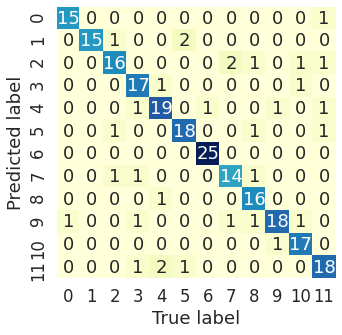

In [20]:
import seaborn as sns

sns.set(font_scale=1.5)

def plot_confusion_matrix(conf_mat):
    '''
    Plot Confusion matrix.
    '''
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    ax = sns.heatmap(conf_mat, annot =True,
                     cbar = False,
                     cmap='YlGnBu')
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
confusion_mat = confusion_matrix(Y_test, Y_preds)
plot_confusion_matrix(confusion_mat)

# Checking the Prediction

In [21]:
import pickle

pickle.dump(model,open('model.pkl','wb'))

In [22]:
model_xgb = pickle.load(open('model.pkl','rb'))

In [23]:

!pip install praw

     |████████████████████████████████| 153kB 7.2MB/s 
     |████████████████████████████████| 204kB 33.4MB/s 


In [24]:
import praw
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import datetime as dt
nltk.download('all')
from bs4 import BeautifulSoup

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [25]:
model = model_xgb

In [26]:
reddit = praw.Reddit(client_id='TbfMVD4uOW0LDQ', client_secret='_YpcW2oj0l5GsI764j2XBOZB4hhRzg', user_agent='flair-detector', 
                     username='yukti_sachdeva', password='yuktisach31')

In [27]:
replace_by_space = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^0-9a-z #+_]')
stopWords = set(stopwords.words('english'))
def text_cleaning(text):
   
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = replace_by_space.sub(' ', text)
    text = bad_symbols.sub('', text)
    text = ' '.join(word for word in text.split() if word not in stopWords)
    return text

def string(value):
    return str(value)

In [38]:
def prediction(url):
	submission = reddit.submission(url = url)
	data = {}
	data["title"] =str(submission.title)
	data["url"] = str(submission.url)
	data["body"] = str(submission.selftext)

	submission.comments.replace_more(limit=None)
	comment = ''
	count = 0
	for top_level_comment in submission.comments:
		comment = comment + ' ' + top_level_comment.body
		count+=1
		if(count > 10):
		 	break
		
	data["comment"] = str(comment)

	data['title'] = text_cleaning(str(data['title']))
	data['body'] = text_cleaning(str(data['body']))
	data['comment'] = text_cleaning(str(data['comment']))
    
	combined_features = data["title"] + data["comment"] + data["body"] + data["url"]

	return str(model.predict([combined_features]))[2:-2]

In [29]:
prediction("https://www.reddit.com/r/india/comments/d1m9ld/iran_removes_antiindia_banners_from_pak_consulate/")

'Sports'

In [30]:
prediction("https://www.reddit.com/r/india/comments/k4ltti/breaking_ag_kk_venugopal_grants_consent_to_a_law/")

'Politics'

In [31]:
y.value_counts()

Policy/Economy        100
Food                  100
Non-Political         100
Coronavirus           100
Business/Finance      100
Politics              100
Photography           100
AMA                   100
Science/Technology    100
Sports                100
Scheduled             100
AskIndia              100
Name: flair, dtype: int64